# Exploring Themes in Modern Art

Erin Zhu
3/20/2023

## Introduction

### Overview
[The Museum of Modern Art (MoMA) Collection](https://github.com/MuseumofModernArt/collection)

* The Museum of Modern Art (MoMA) acquired its first artworks in 1929, the year it was established. Today, the Museum’s evolving collection contains almost 200,000 works from around the world spanning the last 150 years. The collection includes an ever-expanding range of visual expression, including painting, sculpture, printmaking, drawing, photography, architecture, design, film, and media and performance art.

* The Artists dataset contains 15,243 records, representing all the artists who have work in MoMA's collection and have been cataloged in our database. It includes basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.

* This project explores the collection and aims to reveal what artworks are more flavored in modern arts, or in this collection, cutting from different aspects such as themes, scales, and gender ratio of the artworks. 

### Research Topic

* Through analysis on the distribution of the artists and different scales of the artwork, this project researches the underlying information in this dataset, and studies implicit determinants that makes an artwork more flavored in modern art. This project focuses on social and economy environment, gender, and nationality of artists to give a general assessment of possible aspects that affects the frequency of appearance of artworks in this collection and explore the underlying reasons for the pervalence of such artworks. 

### Questions

* What makes a certain type of artwork more common in modern arts and in this collection? Is it gender? Is it history backgrounds? Is it nationality, or even the size of the artwork itself? 
* Are there underrepresented groups in this collection? If there are, what are these groups and what might be the cause of the underrepresentation? 

### Motivation

* Through exploring this dataset, I gradually becomes curious about these questions. The dataset itself is too large to find a certain pattern in it, but with the help of tools, it is possible for us to explore the whole dataset in condensed visualizations. 
* Based off the methods we learned in class, I was interested in how mapping and text analysis could be applied in this dataset to visualize some invisible patterns in this dataset and hopefully approach my research questions and provide some insights into what are we seeing and not seeing in seemingly unbiased artwork collections and even some underrepresented artworks and groups in this collection. I hope that this project would allow us to see some implicit factors that are affecting our flavor of artworks, including reasonable factors and underlying biases. 

## Methods

* TODO: explain your data and your analytical process

## Results

### Data Exploration

Let's start off by importing the dataset and sample some rows in the datasets. 

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import string

In [2]:
# importing data

artists_df = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artists.csv')
artworks_df = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artworks.csv')

In [3]:
artists_df.sample(5)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
13202,44844,Eladio Dieste,"Uruguayan, 1917–2000",Uruguayan,Male,1917,2000,NaN,NaN
1639,1856,Gabriel Fernández Ledesma,"Mexican, 1900–1982",Mexican,Male,1900,1982,NaN,NaN
8049,10117,"Jernbolaget, Eskilstuna, Sweden",est. 1868,NaN,NaN,1868,0,NaN,NaN
14462,67948,Pedro Manrique Figueroa,"Colombian, born 1934",Colombian,Male,1934,0,NaN,NaN
14841,74798,Mikhail Fadeev,Russian,Russian,Male,0,0,NaN,NaN


In [4]:
artworks_df.sample(5)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
58443,Flipper,Blinky Palermo,4474,"(German, 1943–1977)",(German),(1943),(1977),(Male),1970,Screenprint on two sheets,...,http://www.moma.org/media/W1siZiIsIjUyNzM4OCJd...,NaN,NaN,NaN,80.0,NaN,NaN,60.0,NaN,NaN
51834,"Rubber Dummies, Metro Goldwyn Mayer Studios, H...",Edward Weston,6329,"(American, 1886–1958)",(American),(1886),(1958),(Male),1939,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjIwOTA2NSJd...,NaN,NaN,NaN,19.3,NaN,NaN,24.4,NaN,NaN
135340,Catalytic text: 20 January 2017. First line: “...,Ben Kinmont,41829,"(American, born 1963)",(American),(1963),(0),(Male),2018,Newspaper ad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46741,Untitled (plate 8) from the album Champs Délic...,Man Ray (Emmanuel Radnitzky),3716,"(American, 1890–1976)",(American),(1890),(1976),(Male),1922,Gelatin silver print after rayograph,...,http://www.moma.org/media/W1siZiIsIjE5OTI3NyJd...,NaN,NaN,NaN,23.2,NaN,NaN,16.7,NaN,NaN
72949,The Knights (Les Chevaliers) from Xylographs (...,Vasily Kandinsky,2981,"(French, born Russia. 1866–1944)",(French),(1866),(1944),(Male),1909 (executed 1907),One from a portfolio of eight heliogravures af...,...,http://www.moma.org/media/W1siZiIsIjEzNDkwOSJd...,NaN,NaN,NaN,14.3,NaN,NaN,14.5,NaN,NaN


In [5]:
artworks_df['Title'].sample(10)

79056                                    Light in Far Field
137988                                   Cóctel (Cocktail)
3276                                          Bowl (no. 93)
21442     THE LITTLE FISH AND THE FISHERMAN (plate; volu...
135936                  Knifing Victim I, Chicago, Illinois
81267     Tugendhat House, Brno, Czech Republic, Second ...
18398     Plate (folio 17) from Six Geometric Figures an...
122568                              Itinerant Basket-makers
39626                       FONTAINE DU MARCHÉ SAINT-HONORÉ
5777                      From Winters Gloom to Summers Joy
Name: Title, dtype: object

In [6]:
artworks_df['Medium'].sample(10)

19191        One from an illustrated book with 329 woodcuts
22581                                                   NaN
127644                                 Gelatin silver print
974                              Plastic, metal, and rubber
28845     Wood engraving from an illustrated book with 2...
41871                                  Gelatin silver print
95754                                                Poster
78862                         Pen and ink and wash on paper
97238                                  Gelatin silver print
78549                  Watercolor and crayon on graph paper
Name: Medium, dtype: object

Through the example lines, we can see that the title and the medium column are very detailed and thus hard to use as raw to generate summary statistics. 
* Some title column contains not only the titles of the artworks but also some other information. A good way would be to keep only the first part of the title, which is the part before the first ',', to keep as the title of the artwork. 
* The original plan was to create pie plot for types of artworks and relate with other data. Since the 'Medium' column is much more detailed than expected, it would be hard to follow the original plan. Therefore, I decided to explore my topics cutting in from other columns. 

In [7]:
# This cell takes some time to run

artworks_df['First Title'] = '-'

count = 0
for title in artworks_df['Title']:
    if type(title) is str: 
        artworks_df['First Title'][count] = title.split(',')[0]
        count = count + 1

/tmp/ipykernel_70/1156968381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['First Title'][count] = title.split(',')[0]


Now, there will be a new column in the dataframe containing only the first part of the title that will be used for sentiment analysis in the analysis part. 

Text(0, 0.5, 'Frequency')

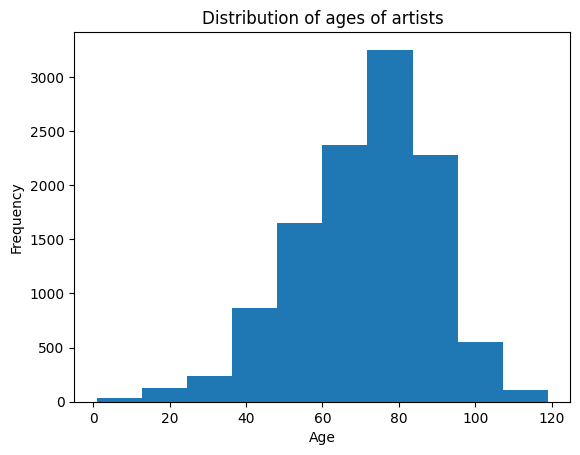

In [8]:
# create a list for ages of artists

count = 0
ages = []
for bd in artists_df['BeginDate']:
    if bd == 0:
        count = count + 1
        continue
    if artists_df['EndDate'][count] == 0:
        age = 2023 - bd
        ages = ages + [age]
        count = count + 1
    else:
        age = artists_df['EndDate'][count] - bd
        ages = ages + [age]
        count = count + 1

# exclude some impossible values

ages = [age for age in ages if age < 120]

plt.hist(ages)
plt.title('Distribution of ages of artists')
plt.xlabel('Age')
plt.ylabel('Frequency')

Above is the distribution of ages of artists in this collection with impossible values excluded. We can see that the majority of artists in this collection ages from around 50 to 90. 

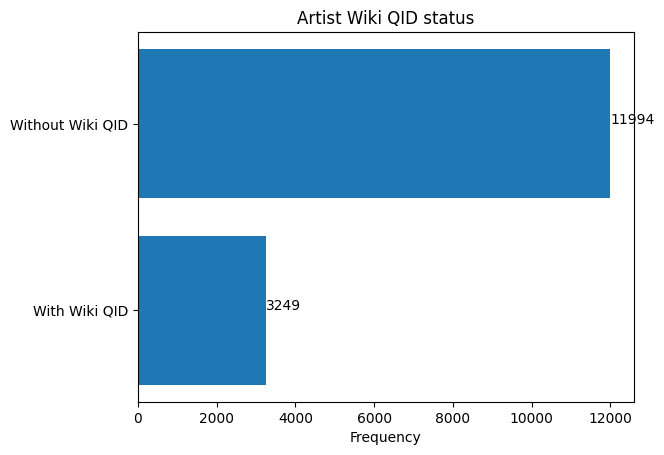

In [9]:
# create a list for counts of artists with and without Wiki QID

type = ['With Wiki QID', 'Without Wiki QID']
count = [0, 0]


for i in artists_df['Wiki QID']:
    if pd.isna(i):
        count[1] = count[1] + 1
    else:
        count[0] = count[0] + 1

plt.barh(type, count)
 
for index, value in enumerate(count):
    plt.text(value, index,str(value))
 
plt.title('Artist Wiki QID status')
plt.xlabel('Frequency')
plt.show()

The above plot shows the number of artists with and without Wiki QID. We can see that the majority of artists in this collection does not have a Wiki QID, implying that this collection probably does not have a tendency towards famous artists. 

In [10]:
date_list = []
for i in artworks_df['Date']:
  if (not pd.isna(i)) and i.isnumeric() and len(i) == 4:
    date_list = date_list + [int(i)]

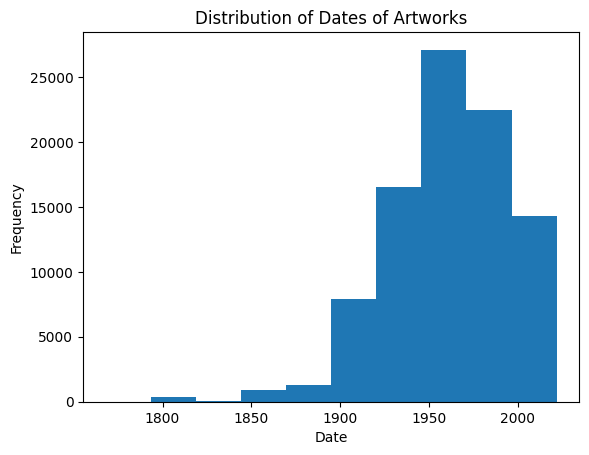

In [11]:
plt.hist(date_list)
plt.title('Distribution of Dates of Artworks')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

Above is a histogram on the distribution of dates that artworks are created. We can see that the graph is right skewed, which means it flavors artworks that are more contemporary as a modern art collection, and has the most artworks created from early 1900s to 2000s. 

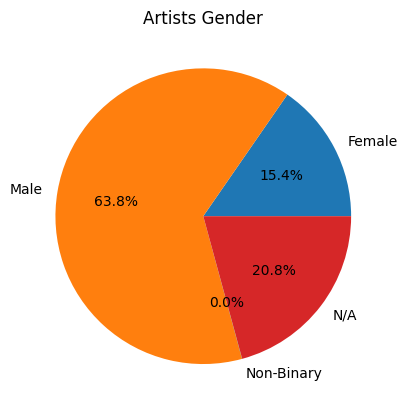

In [12]:
gender = ['Female', 'Male', 'Non-Binary', 'N/A']
gender_count = [0, 0, 0, 0]

for i in artists_df['Gender']:
    if pd.isna(i):
        gender_count[3] += 1
    elif i.lower() == 'female':
        gender_count[0] += 1
    elif i.lower() == 'male':
        gender_count[1] += 1
    elif i.lower() == 'non-binary':
        gender_count[2] += 1
    else:
        gender_count[3] += 1

plt.pie(gender_count, labels=gender, autopct='%1.1f%%')
plt.title('Artists Gender')
plt.show()

From the plot, we can see that most of the artists in this collection are male, 15.4% of them are female, and only nearly neglectable part of them are non-binary. This shows that male artists are more recognized and acknowledged generally within the range of collection. As shown on former graph, the major range of collection for this dataset is between 1900 and 2010, to explore more about how gender of artists could affect themselves and their artworks and how it combines with other factors such as dates and history backgrounds, it is worthy do dig deeper into the relationships of gender and other data in the following focused analysis. 

### Focused Analysis

* Through some exploratoration on the dataset, we can see that this collection does not have uniform distribution on a lot of aspects of artists and artworks. It provides some general insights on the dataset, but not enough to allow us to make conclutions or imply some other underlying factors that causes such distributions. 

* The next session includes a further analysis of the data and provides visualizations to provide a deeper look into the dataset and useful insights that cuts in from a more detailed look to explore the research question. 

In [29]:
# add a new column 'Area' to the dataframe, rounded up to two decimals, in cm^2
artworks_df['Area'] = '-'

count = 0
for a in artworks_df['Area']:
  if pd.isna(artworks_df['Height (cm)'][count]) or pd.isna(artworks_df['Width (cm)'][count]):
    artworks_df['Area'][count] = 0
    count += 1
  else:
    artworks_df['Area'][count] = round(artworks_df['Height (cm)'][count] * artworks_df['Width (cm)'][count], 2)
    count += 1

/tmp/ipykernel_70/3976049913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Area'][count] = round(artworks_df['Height (cm)'][count] * artworks_df['Width (cm)'][count], 2)
/tmp/ipykernel_70/3976049913.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Area'][count] = 0


TODO: analysis 1

## Discussion
* TODO: what does the analysis show, big picture, and how are they useful
* link back to research questions

### Conclusion

## Reference
